In [1]:
import math

In [3]:
a, b = 4, 2                         
attraction_point = [0.0, 0.0]       
attraction_radius = 0.5               
g = 0.001          
p1 = [0.5, -1.5]
initial_angle = 2 * math.pi / 3
v1 = [math.cos(initial_angle), math.sin(initial_angle)]             

In [4]:
m,n = attraction_point[0], attraction_point[1]

In [100]:
t = 0.00001 

In [101]:
x,y = p1[0], p1[1]

In [102]:
mag = 1/ ((m-x) ** 2 + (n-y) ** 2)

In [103]:
def new_p(v,att,t):
    p1 = g ** 2 * t **4 * ( (att-v) * mag) + 2 * g * t ** 3 * v1[0] * v * (att-v) * mag + t ** 2 * v1[0] ** 2 + 2 * t * v1[0] * v
    return p1 + v

In [104]:
new_p(x,0,100)

2530.499999999998

In [32]:
new_p(x,0)

0.495025000099998

In [105]:
pos = []
for T in range(100000):
    pos.append([new_p(x,0, t*T), new_p(y,0,t*T)])

In [12]:
import numpy as np

In [87]:
pos1 = []


In [55]:
p1

[0.5, -1.5]

In [107]:
def ball_movements():
    global position, velocity
    step = 0.00001
    x_0, y_0 = p1
    pos1.append([x_0,y_0])
    vx, vy = v1
    x_new = x_0 + vx * step
    y_new = y_0 + vy * step

    for _ in range(100000):
        pos1.append([x_new,y_new])
        down = [attraction_point[0] - x_new, attraction_point[1] - y_new]
        magnitude = np.hypot(down[0], down[1])
        vx += (down[0] / magnitude) * g
        vy += (down[1] / magnitude) * g
        velocity = [vx, vy]
        x_new = x_0 + vx * step
        y_new = y_0 + vy * step
        
        
    return (x_new, y_new)

In [108]:
ball_movements()

(0.4996787734368738, -1.4990426560469505)

In [106]:
pos

[[0.5, -1.5],
 [0.499995000025, -1.499984999975],
 [0.4999900001, -1.4999699999],
 [0.499985000225, -1.499954999775],
 [0.4999800004, -1.4999399996],
 [0.499975000625, -1.499924999375],
 [0.49997000090000004, -1.4999099990999998],
 [0.49996500122500004, -1.4998949987749997],
 [0.49996000160000004, -1.4998799983999995],
 [0.4999550020250001, -1.4998649979749994],
 [0.4999500025000001, -1.499849997499999],
 [0.4999450030250001, -1.499834996974999],
 [0.4999400036000002, -1.4998199963999985],
 [0.4999350042250002, -1.499804995774998],
 [0.4999300049000003, -1.4997899950999976],
 [0.49992500562500036, -1.499774994374997],
 [0.4999200064000004, -1.4997599935999963],
 [0.4999150072250005, -1.4997449927749955],
 [0.4999100081000006, -1.4997299918999947],
 [0.4999050090250007, -1.4997149909749938],
 [0.4999000100000008, -1.4996999899999928],
 [0.49989501102500095, -1.4996849889749917],
 [0.49989001210000106, -1.4996699878999904],
 [0.49988501322500123, -1.499654986774989],
 [0.4998800144000014

In [109]:
pos1 = pos1[:-1]

In [110]:
pos1

[[0.5, -1.5],
 [0.499995, -1.499991339745962],
 [0.49999499683773435, -1.4999913302591252],
 [0.49999499367546874, -1.4999913207722881],
 [0.4999949905132031, -1.4999913112854513],
 [0.49999498735093745, -1.4999913017986142],
 [0.49999498418867183, -1.4999912923117773],
 [0.4999949810264062, -1.4999912828249402],
 [0.4999949778641406, -1.4999912733381031],
 [0.49999497470187493, -1.4999912638512662],
 [0.4999949715396093, -1.4999912543644291],
 [0.4999949683773437, -1.4999912448775923],
 [0.4999949652150781, -1.4999912353907552],
 [0.4999949620528124, -1.4999912259039183],
 [0.4999949588905468, -1.4999912164170812],
 [0.4999949557282812, -1.4999912069302443],
 [0.4999949525660155, -1.4999911974434073],
 [0.4999949494037499, -1.4999911879565704],
 [0.4999949462414843, -1.4999911784697333],
 [0.49999494307921866, -1.4999911689828964],
 [0.499994939916953, -1.4999911594960593],
 [0.49999493675468737, -1.4999911500092225],
 [0.49999493359242175, -1.4999911405223854],
 [0.49999493043015614,

In [111]:
sse = np.sum(np.abs(np.subtract(pos,pos1)))

ValueError: operands could not be broadcast together with shapes (100000,2) (101000,2) 

In [93]:
sse

9.970048015562117

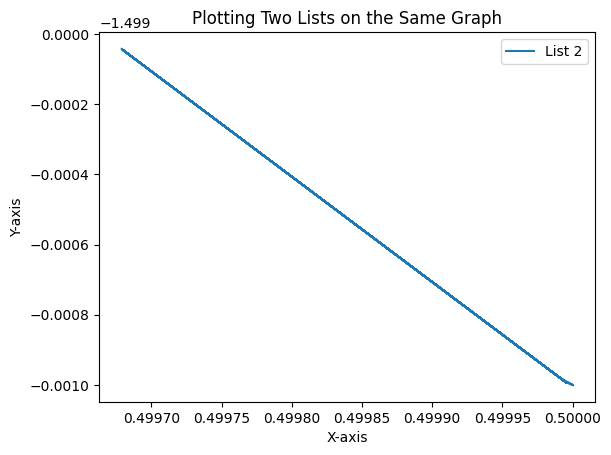

In [116]:
import matplotlib.pyplot as plt
x1, y1 = zip(*pos)
x2, y2 = zip(*pos1)

# Plot the data from both lists on the same graph.
# plt.plot(x1, y1, marker='o', markersize=0.1, linestyle='-', label='List 1')
plt.plot(x2, y2, marker='s', markersize=0.1, linestyle='-', label='List 2')

# Labeling the axes and the plot title.
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Plotting Two Lists on the Same Graph")

# Adding a legend to differentiate the data series.
plt.legend()

# Display the plot.
plt.show()
